In [1]:
data_path = '/home/nero/Documents/Estudos/Data_Science_Projects/DataCampSampleProjects/Data_Scientist_Professional/Data/toyota.csv'

In [2]:
# importing modules for data visualisation and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing and validating the data

In [3]:
# loading the dataset and checking values
data = pd.read_csv(data_path)

# display the head for an view of the columns and initial values
# display the info to check the Dtype and general caracteristics
# describe the data to check an summary of the data caracteristics to better evaluate the cleaning methods
display(data.head(), data.info(), data.describe())

['model', 'transmission', 'fuelType', 'engineSize']
display(data['model'].unique(), data['transmission'].unique(), data['fuelType'].unique(), data['engineSize'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


None

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 0. , 2.4, 3. ,
       2.8, 4.2, 4.5])

## Observation on the data information
<p> The columns model, transmission and fuelType should be set as categorical since they have a limited number of possible values <p>
<p> The data doesn't have any missing values <p>
<p> The proposed categorical values doesn't need treatment<p>
  

In [4]:
# cleaning the model column white spaces and changing to lower case
# for naming consistency
data['model'] = data['model'].str.strip().str.lower()

#changing the data types
categoricals = ['model', 'transmission', 'fuelType']
for col in categoricals:
    data[col] = data[col].astype('category')

# checking changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         6738 non-null   category
 1   year          6738 non-null   int64   
 2   price         6738 non-null   int64   
 3   transmission  6738 non-null   category
 4   mileage       6738 non-null   int64   
 5   fuelType      6738 non-null   category
 6   tax           6738 non-null   int64   
 7   mpg           6738 non-null   float64 
 8   engineSize    6738 non-null   float64 
dtypes: category(3), float64(2), int64(4)
memory usage: 336.8 KB


## Ploting behaviour and descriptive information of the data

In [5]:
# importing seaborn for more plots
import seaborn as sns

## Visualizing the vehicles sold by model

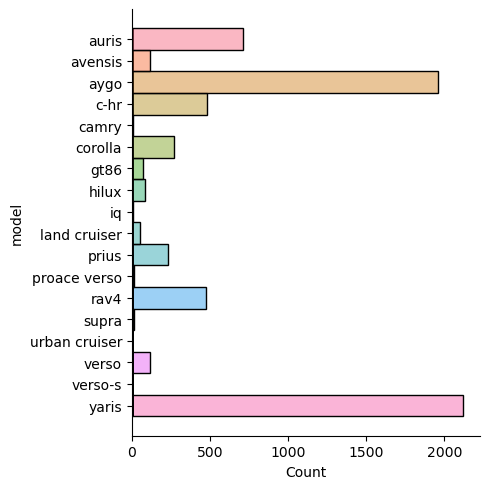

In [6]:
sns.displot(data=data, y='model', kind='hist', hue='model', legend=False)

## Observations
The most popular model is the **yaris** with 2122 vehicles sold followed by the **aygo** with 1961, the least sold model
is the **verso-s** with only 3 units sold

## Ploting the kde plot to observe the most frequent price range of vehicles sold

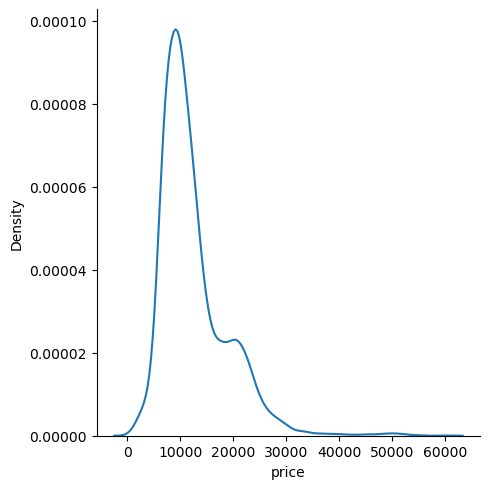

In [7]:
sns.displot(data=data, x='price', kind='kde')

## Observations
Most of the vehicles sold fall around the 10000 price range and with a very low propability of costing more than 30000

## Creating a boxplot to observe the variations in price according to the categorical data

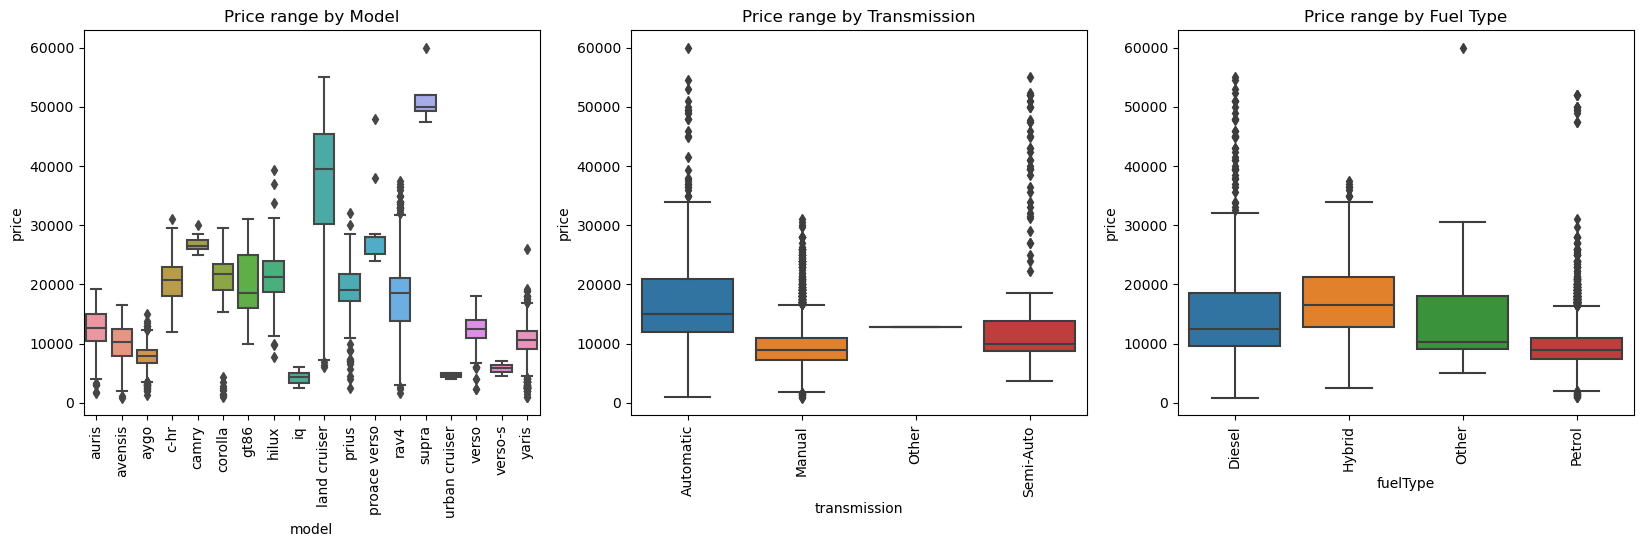

In [8]:
# ploting the values from the diferent categories in boxplots to see the expected range of prices
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=data, x='model',y='price',ax=axes[0]).set(title='Price range by Model')
sns.boxplot(data=data, x='transmission',y='price',ax=axes[1]).set(title='Price range by Transmission')
sns.boxplot(data=data, x='fuelType',y='price',ax=axes[2]).set(title='Price range by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

## Observations

The models have a very diverse price range, with the highest variation model being the Land Cruiser and the least variable being the urban cruiser

With the most expensive vehicle sold being a Supra at 59995 (presumed USD) and the cheapest an avensis at 850 (presumed USD)

## Cheking the relationship of mileage and price

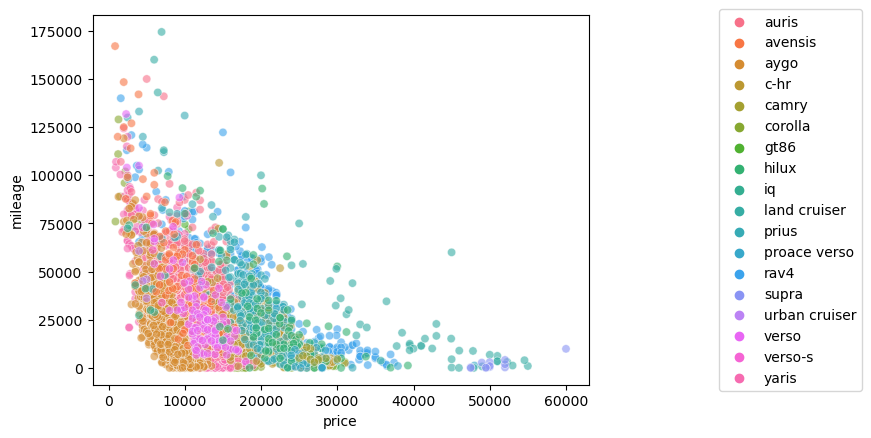

In [9]:
ax_3 = sns.scatterplot(data=data, x='price', y='mileage', alpha=0.6, hue='model', legend='brief')
ax_3.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

## Observations
As observed the cars with less mileage tend to have lower prices, with a few outliers

Confirming that the mileage is negatively correlated with price

In [10]:
data[['mileage','price']].corr()

,mileage,price
mileage,1.000000,-0.297936
price,-0.297936,1.000000


## Main findings
The car model heavily influences its price range, making the model an important feature to consider

The vehicle mileage has a negative correlation with price, meaning that higher mileages tend to lower the vehicle price.

## Defining the problem to be solved by the model

Given that the sales team wants to predict a price based on alredy observed values, given the vehicle features, a Supervised regression model is appropriate for predicting prices

## Preparing the data for model training

Given that the data doesn't contain only numeric values, we must create dummy variables to deal with the categorical values

## Steps
    - Normalize the data with power transformer
    - Split data into training and testing set
    - Create the features and target arrays
    - fit the model
    - score the performance

## Modules

In [11]:
# Baseline model
from sklearn.linear_model import LinearRegression
# Normalize the model
from sklearn.preprocessing import StandardScaler
# Split data
from sklearn.model_selection import train_test_split, KFold
# Score the model based on cross validation
from sklearn.metrics import r2_score,mean_squared_error


## Creating dummy variables for the model column

In [12]:
dummy_vars = pd.get_dummies(data[['model','transmission','fuelType']], dtype=int)

model_data = pd.concat([data.drop(columns=['model','transmission','fuelType']), dummy_vars], axis=1)

model_data.head()

,year,price,mileage,tax,mpg,engineSize,model_auris,model_avensis,model_aygo,model_c-hr,...,model_verso-s,model_yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Spliting and scaling the data for model training

using 70% of the data for training and 30% for testing, using the random_state for reproducibility

In [13]:
X = model_data.drop(columns=['price']) # Features
y = model_data['price'] # Target

scaler = StandardScaler()
# Alter only the needed columns 
X[['year','engineSize','mileage']] = scaler.fit_transform(X.loc[:,['year','engineSize','mileage']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Fiting , testing and scoring the model

In [14]:
# creating the models
linreg = LinearRegression()

# fitting
linreg.fit(X_train, y_train)

# predictions
lin_y_pred = linreg.predict(X_test)

# scoring
lin_r2 = r2_score(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
print(f'linreg R2 score: {lin_r2:.4f} \nlinreg RMSE: {lin_rmse:.4f}')

linreg R2 score: 0.9272 
linreg RMSE: 1707.3744


## Fitting a model for comparisson
    The model chosen for comparisson is a DecisionTreeRegressor

In [15]:
# importing the model
from sklearn.tree import DecisionTreeRegressor
# using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

#params for grid search
params = {'max_depth':np.arange(1,21), 'min_samples_split':np.arange(2,5), 'min_samples_leaf':np.arange(2,6)}

# KFold 
kf = KFold(shuffle=True)
# creating the model
tree = DecisionTreeRegressor() #max_depth=12,min_samples_split=2,random_state=42
grid_search = GridSearchCV(tree, param_grid=params, cv=kf)
grid_search.fit(X_train, y_train)

# Selecting the best parameters for the DecisionTree
max_depth = grid_search.best_params_['max_depth']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
min_samples_split = grid_search.best_params_['min_samples_split']

In [16]:
# scoring the model based on the best parameters
tree = DecisionTreeRegressor(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf = min_samples_leaf, random_state=42)

# fitting the model
tree.fit(X_train, y_train)

# predictions
tree_y_pred = tree.predict(X_test)

# scoring
tree_r2 = r2_score(y_test, tree_y_pred)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_y_pred))
print(f'tree R2 score: {tree_r2:.4f} \ntree RMSE: {tree_rmse:.4f}')

tree R2 score: 0.9499 
tree RMSE: 1416.3258


## Model evaluation
     -Comparing scores

In [18]:
# comparing scores

print('tree scores-> R2: {} ; RMSE:{} \n\nlinreg scores-> R2: {} ; RMSE: {}'.format(tree_r2,tree_rmse, lin_r2, lin_rmse))

tree scores-> R2: 0.9499213305906227 ; RMSE:1416.3257837978608 

linreg scores-> R2: 0.9272247035134881 ; RMSE: 1707.3743887981145


## Model selection

The DecisionTreeRegressor has a better fit to the data and a lower rmse score indicates a smaler error on the prices, meaning that the Decision Tree Regression model is a overall beter fit to the data

## Business metrics
    Since the business sales team has an error around 30% of the listed prices, the model should be based around this number to judge the KPI (Key Performance Indicator) for the business, by checking if the predicted price has an diference of less than 30% of the actual listed price.
    
    Then separating them into to categories, Will sell and Will not sell

## Analysing KPI with linreg model

Text(0.5, 1.0, 'Evaluating Linear Regression Model by KPI')

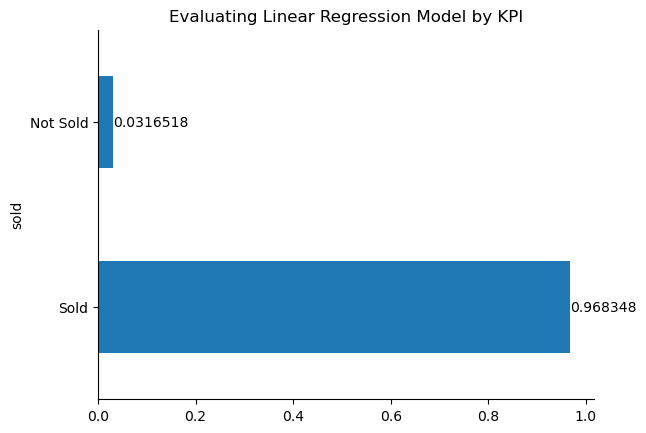

In [19]:
lin_X = pd.DataFrame()
lin_X['diff'] = np.abs(y_test - lin_y_pred)
lin_X['sold'] = (lin_X['diff'] > (y_test * 0.3)).apply(lambda x: 'Not Sold' if x == True else 'Sold')

ax = lin_X['sold'].value_counts(normalize=True).plot.barh()
ax.bar_label((ax.containers[0]))
ax.spines[['right','top']].set_visible(False)
ax.set_title('Evaluating Linear Regression Model by KPI')

## Analysing KPI with Decision Tree Regression model

Text(0.5, 1.0, 'Evaluating Decision Tree Regression Model by KPI')

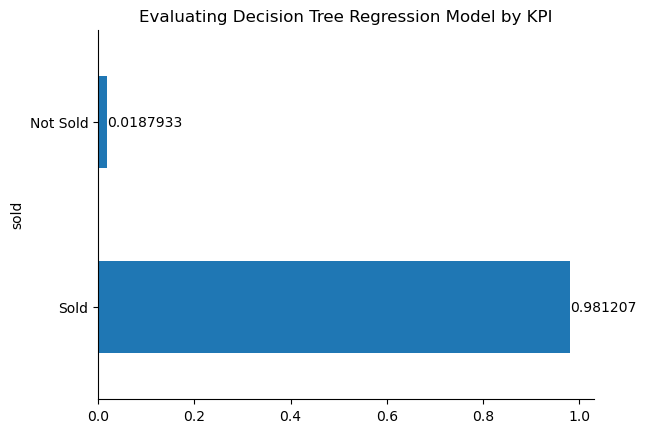

In [20]:
tree_X = pd.DataFrame()
tree_X['diff'] = np.abs(y_test - tree_y_pred)
tree_X['sold'] = (tree_X['diff'] > (y_test * 0.3)).apply(lambda x: 'Not Sold' if x == True else 'Sold')

ax = tree_X['sold'].value_counts(normalize=True).plot.barh()
ax.bar_label((ax.containers[0]))
ax.spines[['right','top']].set_visible(False)
ax.set_title('Evaluating Decision Tree Regression Model by KPI')

## Recomendations

The Decision Tree model is a better model to help new hires in seling the cars, that is expected to sell 98% of the cars.

To better evaluate whether this model can really help junior salespeople price used cars, I would also recommend A/B testing about using this model to compare two groups of junior salespeople.

To implement and improve the model, I will consider the following steps:

    Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices such as mobile and IoT for its convenience and security. However, this might need some work. I will suggest deploying as web services first since it is the easiest way and test the model in newly hired junior salespeople.

    Collecting more data, e.g. time and economic data, the inflation has a huge influence on the car price recently

    Feature Engineering, e.g reduce the categories in model, create more meaningful features from the variables.
